##### Importing required packages

In [1]:
import pandas as pd  #for dealing with dataframes
import numpy as np   #for better numerical operations

###### Preparing a dataframes

In [2]:
air_train = pd.read_csv("train.csv")
air_test = pd.read_csv("test.csv")

###### Getting the shape

In [3]:
air_train.shape

(10000, 12)

In [4]:
air_test.shape

(2500, 11)

In [5]:
air_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [6]:
air_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [7]:
# information of the varibles 
def air_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Unique Data":data.apply(lambda x: x.nunique(),axis=0),
                        "Levels":data.apply(lambda x: str(x.unique()),axis = 0),"Null_values":data.isnull().sum(),'null%':(data.isnull().sum()/100)})

In [8]:
air_data(air_train)

,Data Type,No of Unique Data,Levels,Null_values,null%
Severity,object,4,['Minor_Damage_And_Injuries' 'Significant_Dama...,0,0.0
Safety_Score,float64,1175,[49.2237442922374 62.4657534246575 63.05936073...,0,0.0
Days_Since_Inspection,int64,23,[14 10 13 11 15 18 5 6 12 7 8 17 9 16 20 19 21...,0,0.0
Total_Safety_Complaints,int64,44,[22 27 16 9 25 0 10 4 40 11 2 14 1 3 5 7 20 28...,0,0.0
Control_Metric,float64,952,[71.285323609845 72.2880583409298 66.362807657...,0,0.0
Turbulence_In_gforces,float64,1117,[0.272117562206996 0.42393869455463395 0.32260...,0,0.0
Cabin_Temperature,float64,950,[78.04 84.54 78.86 81.79 77.16 78.63 88.04 83....,0,0.0
Accident_Type_Code,int64,7,[2 7 3 4 1 6 5],0,0.0
Max_Elevation,float64,4191,[31335.4768243775 26024.711057085402 39269.053...,0,0.0
Violations,int64,6,[3 2 1 0 4 5],0,0.0


In [9]:
air_train.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [10]:
import matplotlib.pyplot as plt #to deal with plots
import seaborn as sns #to get better and user friendly plots

Text(0.5, 1.0, 'count of Severity')

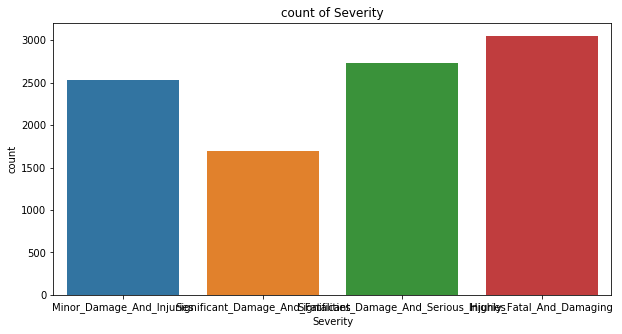

In [11]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot('Severity',data=air_train)
plt.title('count of Severity')

In [12]:
cat_cols = ['Severity']
num_cols = air_train.columns.difference(cat_cols)
num_cols

Index(['Accident_ID', 'Accident_Type_Code', 'Adverse_Weather_Metric',
       'Cabin_Temperature', 'Control_Metric', 'Days_Since_Inspection',
       'Max_Elevation', 'Safety_Score', 'Total_Safety_Complaints',
       'Turbulence_In_gforces', 'Violations'],
      dtype='object')

In [13]:
air_train[cat_cols]=air_train[cat_cols].astype("category")
air_train[num_cols]=air_train[num_cols].astype("float")

In [14]:
air_train.dtypes

Severity                   category
Safety_Score                float64
Days_Since_Inspection       float64
Total_Safety_Complaints     float64
Control_Metric              float64
Turbulence_In_gforces       float64
Cabin_Temperature           float64
Accident_Type_Code          float64
Max_Elevation               float64
Violations                  float64
Adverse_Weather_Metric      float64
Accident_ID                 float64
dtype: object

In [15]:
# Corelation
cor =air_train.corr()
round(cor,3)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000,-0.685,0.058,0.001,0.020,0.033,0.174,0.004,0.042,-0.108,-0.001
Days_Since_Inspection,-0.685,1.000,-0.032,-0.012,-0.002,-0.039,-0.025,0.000,-0.017,0.041,0.001
Total_Safety_Complaints,0.058,-0.032,1.000,-0.020,0.066,0.014,0.035,0.037,-0.019,-0.003,0.005
Control_Metric,0.001,-0.012,-0.020,1.000,-0.643,-0.008,0.008,-0.028,-0.003,-0.028,0.006
Turbulence_In_gforces,0.020,-0.002,0.066,-0.643,1.000,0.011,-0.008,0.048,0.013,0.040,-0.014
Cabin_Temperature,0.033,-0.039,0.014,-0.008,0.011,1.000,0.031,-0.009,0.019,-0.027,0.015
Accident_Type_Code,0.174,-0.025,0.035,0.008,-0.008,0.031,1.000,0.020,0.046,-0.739,-0.012
Max_Elevation,0.004,0.000,0.037,-0.028,0.048,-0.009,0.020,1.000,-0.031,0.173,0.009
Violations,0.042,-0.017,-0.019,-0.003,0.013,0.019,0.046,-0.031,1.000,-0.022,-0.002
Adverse_Weather_Metric,-0.108,0.041,-0.003,-0.028,0.040,-0.027,-0.739,0.173,-0.022,1.000,0.009


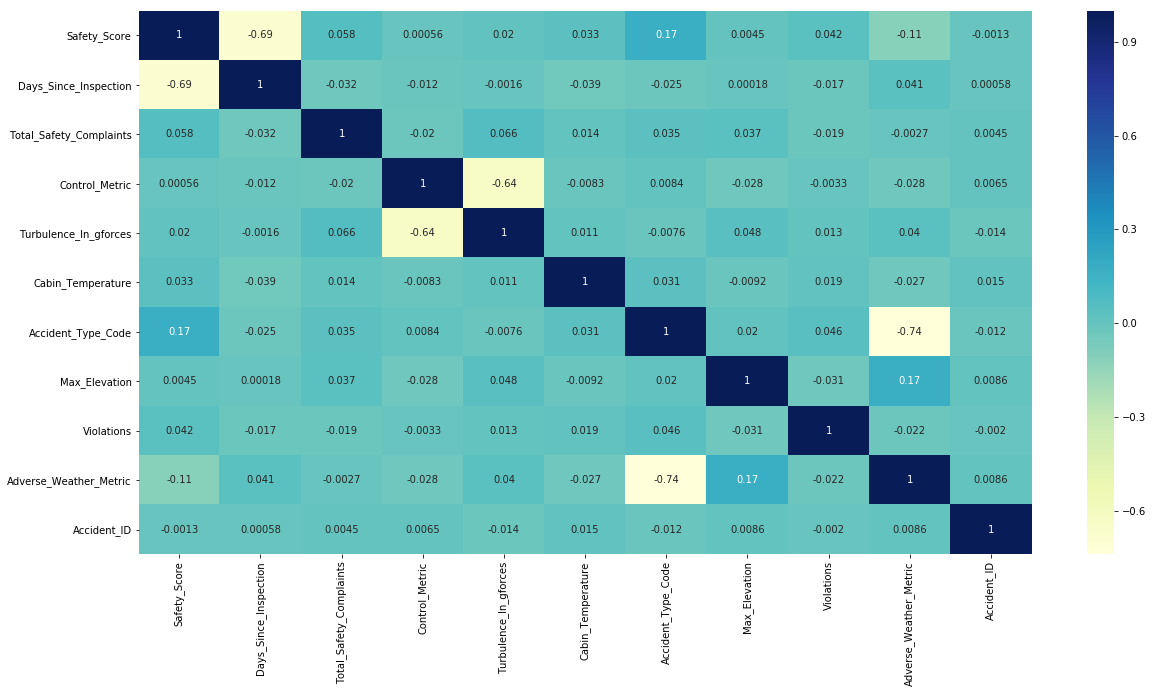

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)

In [17]:
X = air_train.drop(columns=['Severity'],axis=1)
y = air_train['Severity']

In [18]:
from sklearn.model_selection import train_test_split
trainx,valx,trainy,valy = train_test_split(X, y ,test_size=0.3,random_state=123)

print(trainx.shape,valx.shape,trainy.shape,valy.shape)

(7000, 11) (3000, 11) (7000,) (3000,)


In [19]:
trainx.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
3144,40.639269,9.0,3.0,41.020966,0.543304,80.15,1.0,34325.615077,3.0,1.263655,8159.0
9939,18.310502,16.0,9.0,59.070191,0.392565,78.29,5.0,23487.729496,3.0,0.014991,1408.0
7925,38.812785,13.0,0.0,61.531449,0.424299,86.39,3.0,831.695553,3.0,0.047601,100.0
309,32.876712,15.0,7.0,57.748405,0.478392,78.85,5.0,33635.234643,2.0,0.023609,337.0
9415,28.219178,13.0,10.0,86.964448,0.289427,80.65,4.0,36065.208527,2.0,0.065909,7196.0


In [20]:
trainy.head()

3144          Significant_Damage_And_Fatalities
9939                  Highly_Fatal_And_Damaging
7925    Significant_Damage_And_Serious_Injuries
309     Significant_Damage_And_Serious_Injuries
9415                  Highly_Fatal_And_Damaging
Name: Severity, dtype: category
Categories (4, object): [Highly_Fatal_And_Damaging, Minor_Damage_And_Injuries, Significant_Damage_And_Fatalities, Significant_Damage_And_Serious_Injuries]

In [21]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') 

In [1]:
#Standardizing Train Data
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(trainx.iloc[:])

trainx.iloc[:] = scaler.transform(trainx.iloc[:])
trainx.head()

NameError: name 'StandardScaler' is not defined

In [ ]:
## Scale the numeric attributes of Validation Dataset
scaler = StandardScaler()
scaler.fit(valx.iloc[:])

valx.iloc[:] = scaler.transform(valx.iloc[:])

valx.head()

### creating a random search for some hyper parameters given in param_grid_1
from sklearn import tree
dt=tree.DecisionTreeClassifier()

In [25]:
 #creating decision tree classifier with best results form grid search
dt=tree.DecisionTreeClassifier(criterion= 'gini',max_depth= 8,max_features= 'log2',class_weight='balanced')

In [26]:
from sklearn.metrics import classification_report,accuracy_score,f1_score   #to get classification report and accuracy of models

In [27]:
#predicting validation labels
dt.fit(trainx,trainy)
dt_predictions_train=dt.predict(trainx)
print('Decision tree classification report\n\n')
print(classification_report(trainy,dt_predictions_train))
print('f1_score:',f1_score(trainy,dt_predictions_train,average='weighted'))

Decision tree classification report


                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.84      0.70      0.76      2104
              Minor_Damage_And_Injuries       0.65      0.81      0.72      1770
      Significant_Damage_And_Fatalities       0.76      0.75      0.76      1183
Significant_Damage_And_Serious_Injuries       0.79      0.76      0.78      1943

                               accuracy                           0.75      7000
                              macro avg       0.76      0.76      0.75      7000
                           weighted avg       0.76      0.75      0.76      7000

f1_score: 0.7555079924797524


In [28]:
#predicting validation labels
dt_predictions_val=dt.predict(valx)
print('Decision tree classification report\n\n')
print(classification_report(valy,dt_predictions_val))
print('f1_score:',f1_score(valy,dt_predictions_val,average='weighted'))

Decision tree classification report


                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.79      0.67      0.72       945
              Minor_Damage_And_Injuries       0.60      0.76      0.67       757
      Significant_Damage_And_Fatalities       0.72      0.66      0.69       512
Significant_Damage_And_Serious_Injuries       0.74      0.72      0.73       786

                               accuracy                           0.70      3000
                              macro avg       0.71      0.70      0.70      3000
                           weighted avg       0.72      0.70      0.71      3000

f1_score: 0.7063204575480085


In [29]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [30]:
#getting best parameters form random search
rf.fit(trainx,trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rf=RandomForestClassifier(criterion='entropy',max_depth=8,min_samples_split=0.001,class_weight='balanced')
rf.fit(trainx,trainy)
predictions=rf.predict(trainx)
print(classification_report(trainy,predictions))
print(f1_score(trainy,predictions,average='weighted'))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.93      0.87      0.90      2104
              Minor_Damage_And_Injuries       0.83      0.88      0.85      1770
      Significant_Damage_And_Fatalities       0.87      0.91      0.89      1183
Significant_Damage_And_Serious_Injuries       0.89      0.87      0.88      1943

                               accuracy                           0.88      7000
                              macro avg       0.88      0.88      0.88      7000
                           weighted avg       0.88      0.88      0.88      7000

0.8796807065516264


In [32]:
predictions=rf.predict(valx)
print(classification_report(valy,predictions))
print(f1_score(valy,predictions,average='weighted'))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.89      0.84      0.86       945
              Minor_Damage_And_Injuries       0.75      0.77      0.76       757
      Significant_Damage_And_Fatalities       0.80      0.85      0.82       512
Significant_Damage_And_Serious_Injuries       0.83      0.83      0.83       786

                               accuracy                           0.82      3000
                              macro avg       0.82      0.82      0.82      3000
                           weighted avg       0.82      0.82      0.82      3000

0.8205954009468713
